## Predict Hand written numbers MNIST using TensorFlow and Keras

Throughout this kernal, we'll be using a famous optical character recognition (OCR) dataset called MNIST. This dataset comprises of 70000 grayscale images of handwritten digits. Using this dataset in deep learning research and education is classical and that's why we choose it here. In the following, we'll load the dataset and do some data preprocessing. As we'll see shortly, each image is represented as 28x28 pixel data. This is a two-dimensional vector. We'll first convert this to a vector of 784 length which will be single-dimensional. We also normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale).
We load the MNIST dataset using Keras' datasets module. We use mnist class from this module to load the MNIST data. 

Our purpose is to build a deep learning model that can predict the 10 digit numbers based on hand written images.

Let's start by installing TensorFlow

In [2]:
pip install tensorflow

     |████████████████████████████████| 120.8 MB 26 kB/s  eta 0:00:011  |██▌                             | 9.3 MB 1.2 MB/s eta 0:01:32     |███▋                            | 13.7 MB 21.4 MB/s eta 0:00:05     |████▉                           | 18.2 MB 21.4 MB/s eta 0:00:05     |███████████▍                    | 42.9 MB 15.3 MB/s eta 0:00:06     |████████████▊                   | 48.2 MB 15.3 MB/s eta 0:00:05     |████████████████▎               | 61.7 MB 25.9 MB/s eta 0:00:03     |████████████████████            | 75.4 MB 23.1 MB/s eta 0:00:02     |███████████████████████         | 87.0 MB 23.1 MB/s eta 0:00:02��███▌  | 111.3 MB 31.6 MB/s eta 0:00:01███▋  | 111.7 MB 1.9 MB/s eta 0:00:05
     |████████████████████████████████| 63 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 50 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 41 kB 2.0 MB/s  eta 0:00:01
     |███████████████████████████

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [4]:
# Split the dataset and do our preprocessing:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28 is the original 2D image. We transform our 2D dataset to 1D
output_dim = nb_classes = 10 # 10 digits --> 10 classes
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim) # 60000 is the amount of train entries
X_test = X_test.reshape(10000, input_dim) # 10000 is the amount of test entries
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale)
X_test /= 255

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# One hot code our target variable using to_categorical function of Keras' utils module
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [7]:
# Take a look at the shape of X_train. We have 60000 rows and 784 features
X_train.shape

(60000, 784)

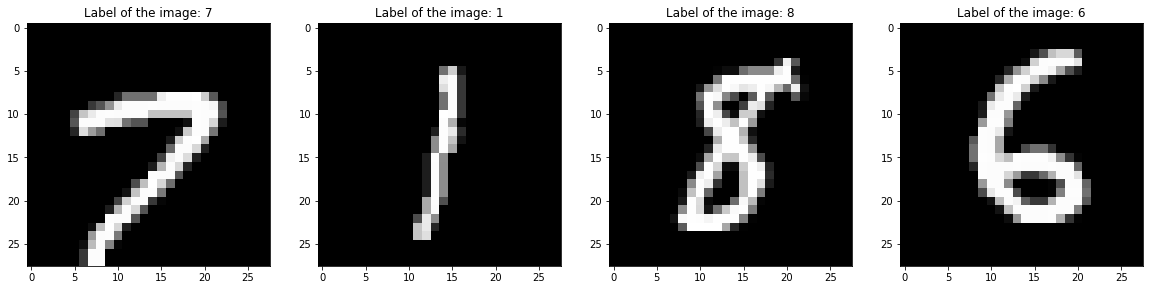

In [9]:
# Take a look at some of the original images:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(1,4,2)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(1,4,3)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(1,4,4)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

### First model

In [10]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compiling the model:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 416us/sample - loss: 1.0370 - accuracy: 0.7776
Epoch 2/20
60000/60000 [==============================] - 25s 410us/sample - loss: 0.4281 - accuracy: 0.8892
Epoch 3/20
60000/60000 [==============================] - 22s 359us/sample - loss: 0.3448 - accuracy: 0.9056
Epoch 4/20
60000/60000 [==============================] - 20s 342us/sample - loss: 0.3063 - accuracy: 0.9145
Epoch 5/20
60000/60000 [==============================] - 21s 351us/sample - loss: 0.2812 - accuracy: 0.9212
Epoch 6/20
60000/60000 [==============================] - 21s 346us/sample - loss: 0.2620 - accuracy: 0.9267
Epoch 7/20
60000/60000 [==============================] - 22s 360us/sample - loss: 0.2463 - accuracy: 0.9315
Epoch 8/20
60000/60000 [==============================] - 20s 340us/sample - loss: 0.2324 - accuracy: 0.9341
Epoch 9/20
60000/60000 [==============================] - 23s 391us/sample - loss: 0.2204 - accuracy: 0.9

In [14]:
# Print out the testing score:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14314549036175012
Test accuracy: 0.9585


The test set accuracy of our model is almost 96%. This is quite a very good result! Let's play with our model, specifically with the model's hyperparameters to see if we can improve our result.

### Second model:

In [15]:
model1 = Sequential()
# our first dense layer
model1.add(Dense(32, input_shape=(784,), activation="relu"))
# our second dense layer
model1.add(Dense(16, activation="relu"))
# last layer is the output layer.
model1.add(Dense(10, activation="softmax"))

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# setting verbose=1 prints out some results after each epoch
model1.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 1.3724 - accuracy: 0.5854
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6659 - accuracy: 0.8188
Epoch 3/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4817 - accuracy: 0.8677
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4040 - accuracy: 0.8872
Epoch 5/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3623 - accuracy: 0.8974s - loss: 0.3
Epoch 6/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3352 - accuracy: 0.9047
Epoch 7/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3158 - accuracy: 0.9097
Epoch 8/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3006 - accuracy: 0.9142
Epoch 9/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2879 - accuracy: 0.9186
E

In [19]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.20947346605658532
Test accuracy: 0.9388


Our second model has the same number of layer as our first model, but has less neurons. Our second model took a lot less time to execute, but has a smaller accuracy compared to the first model.

### Third model:

In [20]:
model2 = Sequential()
# our first dense layer
model2.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model2.add(Dense(512, activation="relu"))
# our third dense layer
model2.add(Dense(256, activation="relu"))
# our fourth dense layer
model2.add(Dense(128, activation="relu"))
# our fifth dense layer
model2.add(Dense(64, activation="relu"))
# last layer is the output layer.
model2.add(Dense(10, activation="softmax"))

In [22]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
____________________________________________

In [23]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# setting verbose=1 prints out some results after each epoch
model2.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 372us/sample - loss: 1.1635 - accuracy: 0.7113
Epoch 2/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3533 - accuracy: 0.9013
Epoch 3/20
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2741 - accuracy: 0.9218
Epoch 4/20
60000/60000 [==============================] - 17s 289us/sample - loss: 0.2337 - accuracy: 0.9320
Epoch 5/20
60000/60000 [==============================] - 18s 308us/sample - loss: 0.2047 - accuracy: 0.9412
Epoch 6/20
60000/60000 [==============================] - 17s 283us/sample - loss: 0.1813 - accuracy: 0.9482
Epoch 7/20
60000/60000 [==============================] - 17s 282us/sample - loss: 0.1627 - accuracy: 0.9525
Epoch 8/20
60000/60000 [==============================] - 18s 293us/sample - loss: 0.1479 - accuracy: 0.9577
Epoch 9/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1340 - accuracy: 0.9

In [26]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08257538281586022
Test accuracy: 0.9747


Our third model has 3 more layer of neurons. It took a bit longer to execute, but increased our accuracy by 2%.